## 1. Data Cleaning & Exploring the Data 


After Reviewing the Documentation of the dataset, the vehicle labels are divide into three categories as follows:

*   “C” – Car
*   “Y”- Motorcycle
*   “H” – Heavy Vehicle



Making a sample API call to the test dataset for the date 1st January 2022 at 12PM

In [4]:
import requests
import json
import pandas as pd

# Change these values for different dates
year = "2022"
month = "1"
day = "1"
hour = "12"
minute = "0"
second = "0"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

data = data["items"][0]["carpark_data"]
with open("EE4211data.json", 'w') as fp:
    json.dump(data, fp)
df = pd.read_json("EE4211data.json")
for heading in ("total_lots","lot_type","lots_available"):
    df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
df = df.drop(["carpark_info"], axis=1)
df.head()

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A00
2022-01-01T11:59:27+08:00


,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-01-01T07:00:57,105,C,0
1,HLM,2022-01-01T11:49:34,583,C,201
2,RHM,2022-01-01T07:00:58,329,C,114
3,BM29,2022-01-01T05:30:33,97,C,88
4,Q81,2022-01-01T11:49:37,96,C,0


Let us now make an API call one second later at 12:00:01 on the same day i.e. 1/1/2022

In [5]:
# Change these values for different dates
year = "2022"
month = "1"
day = "1"
hour = "12"
minute = "0"
second = "1"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

data = data["items"][0]["carpark_data"]
with open("EE4211data.json", 'w') as fp:
    json.dump(data, fp)
df = pd.read_json("EE4211data.json")
for heading in ("total_lots","lot_type","lots_available"):
    df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
df = df.drop(["carpark_info"], axis=1)
df.head()

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A01
2022-01-01T11:59:27+08:00


,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-01-01T07:00:57,105,C,0
1,HLM,2022-01-01T11:49:34,583,C,201
2,RHM,2022-01-01T07:00:58,329,C,114
3,BM29,2022-01-01T05:30:33,97,C,88
4,Q81,2022-01-01T11:49:37,96,C,0


As we can observe, the carpark dataset does not update every second based on the head of the data. The next step would be to check if the carpark dataset updates within a minute. If it does not update within a minute, we have confirmation it does not update in a second either. So we define the API call as a function in order to check the above.

In [6]:
def APICall(year, month, day, hour, minute, second):
  site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
  print(site)
  response_API = requests.get(site)
  data = response_API.text
  data = json.loads(data)
  timestamp = data["items"][0]["timestamp"]
  print(timestamp)

  data = data["items"][0]["carpark_data"]
  with open("EE4211data.json", 'w') as fp:
      json.dump(data, fp)
  df = pd.read_json("EE4211data.json")
  for heading in ("total_lots","lot_type","lots_available"):
      df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
  df = df.drop(["carpark_info"], axis=1)
  return df

Now we define a function to check the updates that take place within a minute. To do so we select 10 second intervals to check the number of updates within a minute by comparing the update_time of the initial data extracted and the new data obtained every 10 seconds. We choose 10 seconds as a 1 second interval would be too slow to test. Conversely, we choose 10 seconds over higher time intervals as a single error in fetching the data from the API call would increase the chances of missing an 'update.'

In [ ]:
# The initial data we extract from 1/1/2022 12:00:00
initial_df = APICall("2022", "1", "1", "12","0", "0")

# The function checkSecondUpdates compares each new update every 10 seconds
# to the updates that take place later on every 10 seconds
# It returns no_update if no updates take place in a 10 second interval
# Returns the update number if it takes place and finally returns the total
# number of updates that took place
def checkSecondUpdates(initial_df):
  updates_per_min = 0
  for i in range(10, 61, 10):
    try:
      # first check takes place at 12:00:10
      new_df = APICall("2022", "1", "1", "12","0",str(i))
      if(initial_df['update_datetime'].equals(new_df['update_datetime'])):
        print('no_updates')
      else:
        updates_per_min = updates_per_min + 1
        print(i)
    except:
      continue
    initial_df = new_df
  print("The number of updates that took place in a minute is", updates_per_min)

checkSecondUpdates(initial_df)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A00
2022-01-01T11:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A10
2022-01-01T11:59:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A20
2022-01-01T11:59:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A30
2022-01-01T12:00:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A40
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A50
2022-01-01T12:00:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A60
The number of updates that took place in a minute is 0


We can see that the data does not update within a minute (therefore does not update in a second) and so we need to check if the data updates each minute or in a specified set of minutes. The documentation for this LTA dataset specifies that updates take place every minute, so we need to verify if this is indeed the case. So we modify the function checkSecondUpdates to check updates every minute and we will see the number of updates that take place every minute in a fixed time interval of 5 minutes over half an hour. By the documentation, we should expect 5 such updates to take place every 5 minutes if every data call is sucessful. If not, we should expect an update for each sucessful API call.

In [7]:
# The initial data we extract from 1/1/2022 12:00:00
initial_df = APICall("2022", "1", "1", "12","0", "0")

def checkMinuteUpdates(initial_df):
  minute_updates = 0
  for i in range(5, 31, 5):
    try:
      # first check takes place at 12:01:00
      new_df = APICall("2022", "1", "1", "12",str(i),"0")
      if(initial_df['update_datetime'].equals(new_df['update_datetime'])):
        print('no_updates')
      else:
        minute_updates = minute_updates + 1
        print(i)
    except:
      continue
    initial_df = new_df
  print("The number of updates that took place in 30 minutes is", minute_updates)

checkMinuteUpdates(initial_df)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A00
2022-01-01T11:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A05%3A00
2022-01-01T12:04:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A10%3A00
2022-01-01T12:09:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A15%3A00
2022-01-01T12:14:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A20%3A00
2022-01-01T12:19:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A25%3A00
2022-01-01T12:24:27+08:00
25
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A30%3A00
2022-01-01T12:29:27+08:00
no_updates
The number of updates that took place in 30 minutes is 1


Interestingly, we see one update take place over 30 minutes, specifically at the 25th minute (between 20 and 25 minutes) which contradicts what we anticpated. Let us now check the interval so we can know when the update takes place exactly. 

In [ ]:
# The initial data we extract from 1/1/2022 12:00:00
initial_df = APICall("2022", "1", "1", "12","0", "0")

def checkMinuteUpdates(initial_df):
  minute_updates = 0
  for i in range(20, 26, 1):
    try:
      # first check takes place at 12:01:00
      new_df = APICall("2022", "1", "1", "12",str(i),"0")
      if(initial_df['update_datetime'].equals(new_df['update_datetime'])):
        print('no_updates')
      else:
        minute_updates = minute_updates + 1
        print("The update takes place at minute", i)
    except:
      continue
    initial_df = new_df

checkMinuteUpdates(initial_df)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A00
2022-01-01T11:59:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A20%3A00
2022-01-01T12:19:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A21%3A00
2022-01-01T12:20:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A22%3A00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A23%3A00
2022-01-01T12:22:26+08:00
The update takes place at minute 23
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A24%3A00
2022-01-01T12:23:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A25%3A00
2022-01-01T12:24:27+08:00
no_updates


The update takes place at the 23rd minute (12:23:00), however, we are unsure when the update prior to this took place. So now we check the minutes it takes after this particular update takes place. We start by looking for the interval during which this next update takes place, so we use 5 minute intervals again.

In [ ]:
# The initial data we extract from 1/1/2022 12:23:00
initial_df = APICall("2022", "1", "1", "12","23", "0")

def checkMinuteUpdates(initial_df):
  minute_updates = 0
  for i in range(23, 58, 5):
    try:
      # first check takes place at 12:27:00
      new_df = APICall("2022", "1", "1", "12",str(i),"0")
      if(initial_df['update_datetime'].equals(new_df['update_datetime'])):
        print('no_updates')
      else:
        minute_updates = minute_updates + 1
        print("The update takes place at minute", i)
    except:
      continue
    initial_df = new_df

checkMinuteUpdates(initial_df)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A23%3A00
2022-01-01T12:22:26+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A23%3A00
2022-01-01T12:22:26+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A28%3A00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A33%3A00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A38%3A00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A43%3A00
2022-01-01T12:42:26+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A48%3A00
2022-01-01T12:47:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A53%3A00
2022-01-01T12:52:27+08:00
The update takes place at minute 53


The next update takes place in the interval of 48 to 53 minutes (12:48:00 to 12:53:00) , let us now find the exact time.


In [ ]:
# The initial data we extract from 1/1/2022 12:22:00
initial_df = APICall("2022", "1", "1", "12","22", "0")

def checkMinuteUpdates(initial_df):
  minute_updates = 0
  for i in range(47, 54, 1):
    try:
      # first check takes place at 12:47:00
      new_df = APICall("2022", "1", "1", "12",str(i),"0")
      if(initial_df['update_datetime'].equals(new_df['update_datetime'])):
        print('no_updates')
      else:
        minute_updates = minute_updates + 1
        print("The update takes place at minute", i)
    except:
      continue
    initial_df = new_df

checkMinuteUpdates(initial_df)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A22%3A00
2022-01-01T12:21:27+08:00
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A46%3A00
2022-01-01T12:45:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A47%3A00
2022-01-01T12:46:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A48%3A00
2022-01-01T12:47:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A49%3A00
2022-01-01T12:48:27+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A50%3A00
2022-01-01T12:49:26+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A51%3A00
2022-01-01T12:50:26+08:00
no_updates
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A52%3A00
2022-01-01T12:51

The next update takes place at the 52nd minute (12:52:00). Therfore our estimated time elapsed between updates is about **30 minutes**. 

<a name="1.3i"></a>
**1.3 (i) How many carparks are included in the data.gov.sg car park database?**




Carparks at latest time.

In [ ]:
df = APICall("2022", "10", "19", "22", "31", "0")

count = initial_df.carpark_number.unique().size
count

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-10-19T22%3A31%3A00
2022-10-19T22:30:27+08:00


1957

1957 carparks as of 19/10/2022, 10:31 pm

<a name="1.3ii"></a>
**(ii) Does this number vary based on the time? You should notice that it does vary with time.** 


Yes the the number of carparks varies with time. Let us check this variance by first getting the number of carparks as of 1/1/2022 at 12:00:00.

In [ ]:
# The initial data we extract from 1/1/2022 12:00:00
initial_df = APICall("2022", "1", "1", "12","0", "0")

# We count the number of unqiue carkpark_numbers in the dataframe to get the
# number of carparks 
count = initial_df.carpark_number.unique().size
count

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-01-01T12%3A00%3A00
2022-01-01T11:59:27+08:00


1957

Let us now check the number of carparks as of the next month i.e. 1/2/2022 at 12:00:00.

In [ ]:
# The initial data we extract from 2/1/2022 12:00:00
new_df = APICall("2022", "2", "1", "12","0", "0")

# We count the number of unqiue carkpark_numbers in the dataframe to get the
# number of carparks 
count = new_df.carpark_number.unique().size
count

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T12%3A00%3A00
2022-02-01T11:59:27+08:00


1958

As we can see the counts on both these days are different. Within a span of one month we have an extra carpark added. (from 1957 -> 1958)

<a name="1.3iii"></a>
**(iii) A carpark may have malfunctioning sensors and nor report its data. Identify one of these
carparks with anomalous sensors and a time period where that carpark’s sensors were
malfunctioning.** 

To identify a carpark whose sensor is malfunctioning, we look for a carpark where such the total lots is 0. Since every carpark should have at least 1 parking space to be considered a carpark. 

In [ ]:
df = APICall("2022", "2", "1", "12","0", "0")
df.loc[df['total_lots'] == "0"]



https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-02-01T12%3A00%3A00
2022-02-01T11:59:27+08:00


,carpark_number,update_datetime,total_lots,lot_type,lots_available
1945,BJ1L,2020-12-11T23:33:04,0,C,0


We thus have the carpark BJ1L that has 0 number of lots. Note that the update_datetime is from two years ago which means the sensors of that carpark have not been working for quite some time. 

<a name="1.4"></a>
**1.4 Generate hourly readings from the raw data. Select a one month interval and plot the hourly data (time-series) for that interval (aggregate results instead of plotting for each location individually). 
Identify any patterns in the visualization.** 

**Note: You will have to decide what to do if there are no carpark readings for a certain hour, for example, should you impute the missing data or ignore it.** 


We will start by collecting data for the month of September 2022  (most recent data). 

First we define the function to get the carpark availability data of a specific time from LTA's API.

In [8]:
def get_data(year,month,day,hour,minute,second):
    year = str(year)
    month = str(month)
    day = str(day)
    hour = str(hour)
    minute = str(minute)
    second = str(second)
    
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    print(site)
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]
    print(timestamp)

    data = data["items"][0]["carpark_data"]
    with open("EE4211data.json", 'w') as fp:
        json.dump(data, fp)
    df = pd.read_json("EE4211data.json")
    for heading in ("total_lots","lot_type","lots_available"):
        df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
    df = df.drop(["carpark_info"], axis=1)
    return df

Then, we call this function iteratively to get the hourly data for the month of September 2022. 

*Note: there are no data from the API for the time of 0000hrs. Since this is consistent for all carparks, we will not be collecting the data points of all carparks for that timing as it will just be NULL. This is fine as it will not affect our results for the subsequent questions anyway.*

This will give us a resultant dataframe of 23 x 30 = 690 hourly datapoints.


In [9]:
day = 1
hour = 2

# Gets the first df (first hour of first day)
first = get_data(2022,9,day,hour-1,0,0)
first = first[['carpark_number','lots_available']]

# Gets the rest in hourly interval
while day != 30 or hour != 24:
    try:
        second = get_data(2022,9,day,hour,0,0)
        # Formats new df and merge with previous hour
        second = second[['carpark_number','lots_available']]
        second.rename(columns = {'lots_available':"{0}-{1}".format(hour,day)}, inplace = True)
        second.drop_duplicates(subset="carpark_number",keep=False, inplace=True)
        first = pd.merge(first, second, on='carpark_number', how='left')

        # Increment to next hour
        hour += 1
        if hour == 24:
            hour = 1
            day += 1
    # API will keep crashing, try again if it fails    
    except KeyError:
        pass


https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-09-01T01%3A00%3A00


KeyError: 'items'

We will save this to a JSON file for futher access to save us from the pain of running the code again to  collect the hourly data for an entire month.

In [ ]:
with open('hourly.json', 'w') as f:
    f.write(first.to_json(orient='records', lines=True))

Now, we can get the data easily. 

Columns are named in terms of hour-day. Eg: 1-30 means first hour of day thirty.

In [ ]:
sep_df = pd.read_json("hourly.json", lines=True)
sep_df

,carpark_number,1-1,2-1,3-1,4-1,5-1,6-1,7-1,8-1,9-1,...,14-30,15-30,16-30,17-30,18-30,19-30,20-30,21-30,22-30,23-30
0,HE12,53,59.0,56.0,48.0,35.0,22.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HLM,480,479.0,478.0,478.0,474.0,470.0,459.0,375.0,276.0,...,46.0,93.0,123.0,174.0,221.0,227.0,242.0,295.0,376.0,442.0
2,RHM,122,122.0,118.0,116.0,113.0,111.0,120.0,123.0,166.0,...,118.0,152.0,195.0,200.0,200.0,165.0,133.0,133.0,137.0,137.0
3,BM29,81,82.0,83.0,83.0,83.0,83.0,78.0,36.0,20.0,...,0.0,0.0,0.0,11.0,23.0,23.0,13.0,22.0,25.0,62.0
4,Q81,79,80.0,79.0,79.0,79.0,75.0,53.0,7.0,13.0,...,6.0,30.0,34.0,31.0,24.0,27.0,20.0,46.0,59.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,B65M,320,318.0,312.0,306.0,305.0,303.0,334.0,370.0,430.0,...,479.0,479.0,480.0,474.0,484.0,464.0,424.0,384.0,361.0,354.0
1967,B65L,4,4.0,4.0,4.0,4.0,4.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968,BE3,52,48.0,47.0,45.0,43.0,55.0,95.0,132.0,154.0,...,171.0,170.0,166.0,175.0,159.0,133.0,106.0,90.0,80.0,68.0
1969,BE3R,78,76.0,72.0,71.0,71.0,74.0,86.0,99.0,109.0,...,107.0,104.0,105.0,106.0,98.0,81.0,67.0,72.0,84.0,81.0


Now, we plot the time series graph for the month of September 2022.

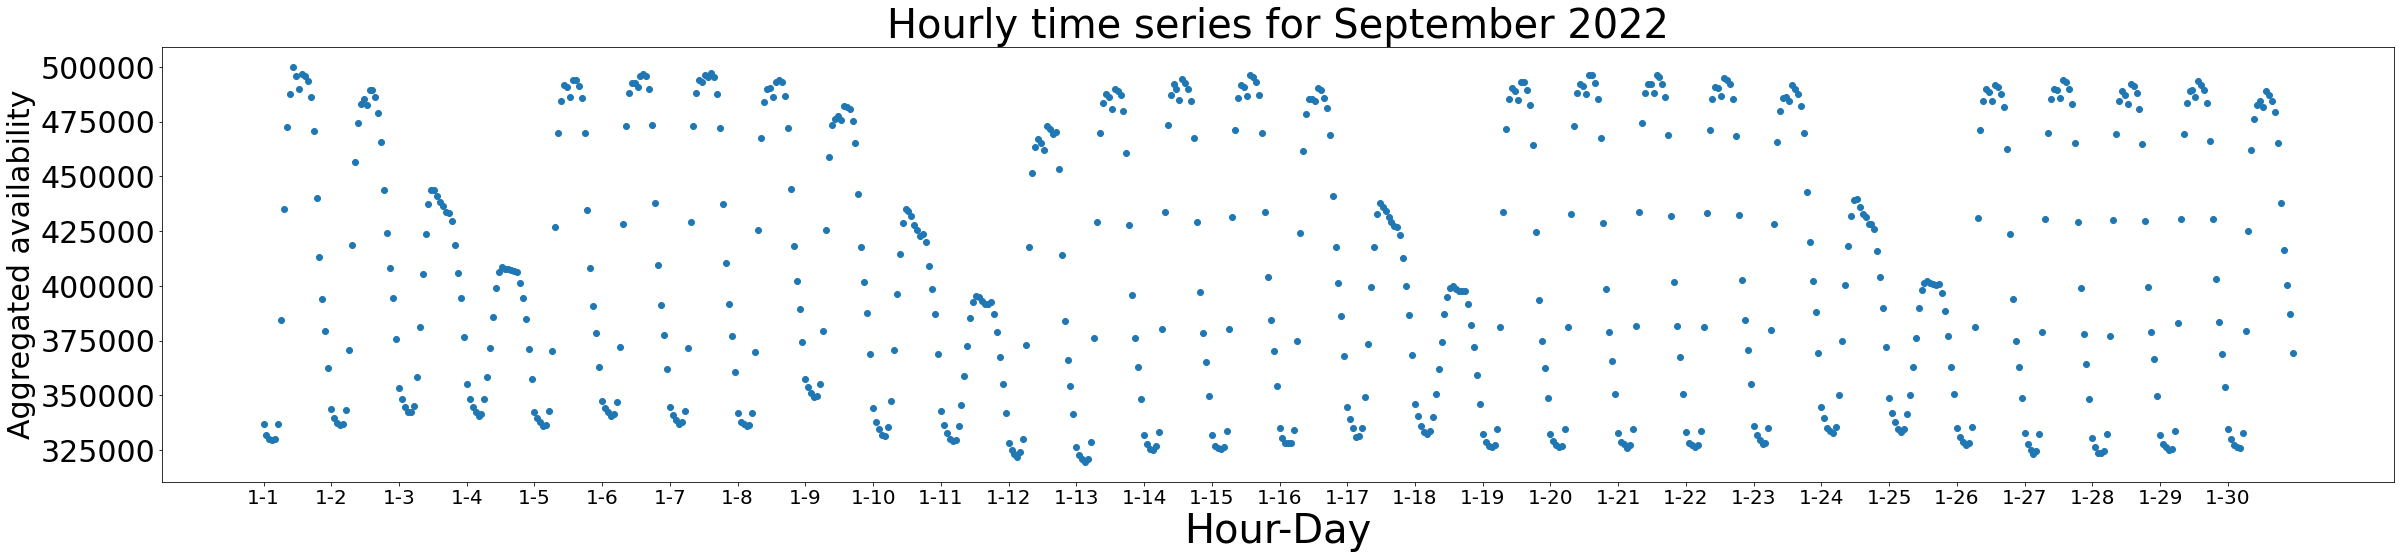

In [ ]:
import matplotlib.pyplot as plt

# Gets the data. 
# x-axis is the time intervals, 
# y-axis is the aggregated sum of all the availability for all carparks of a specific hour.
results = []
for col in sep_df.columns[1:]:
    results.append(sep_df[col].sum())
y = results
x = sep_df.columns[1:].tolist()

# Plotting the graph
plt.figure(figsize=(40,8))
plt.scatter(x,y)
plt.title("Hourly time series for September 2022", fontdict = {'fontsize' : 40})
plt.xlabel("Hour-Day",fontsize=40)
plt.ylabel("Aggregated availability",fontsize=30)
plt.xticks(x[::23],fontsize=20) #sets interval to daily, and increase fontsize for visibility
plt.yticks(fontsize=30)
plt.show()

The data follows a similar trend as shown.

For the month of september, it can be seen that the during the morning hours theres are high availabilities of parking spot in the city, This is likely due to the fact that majority of the people in the city are going for work, which means most of the vehicles in the city are in transit, instead of being parked at a particular car spot. The trend that can in the month of september is that the carpark reaches a low after 5 to 6 hours.

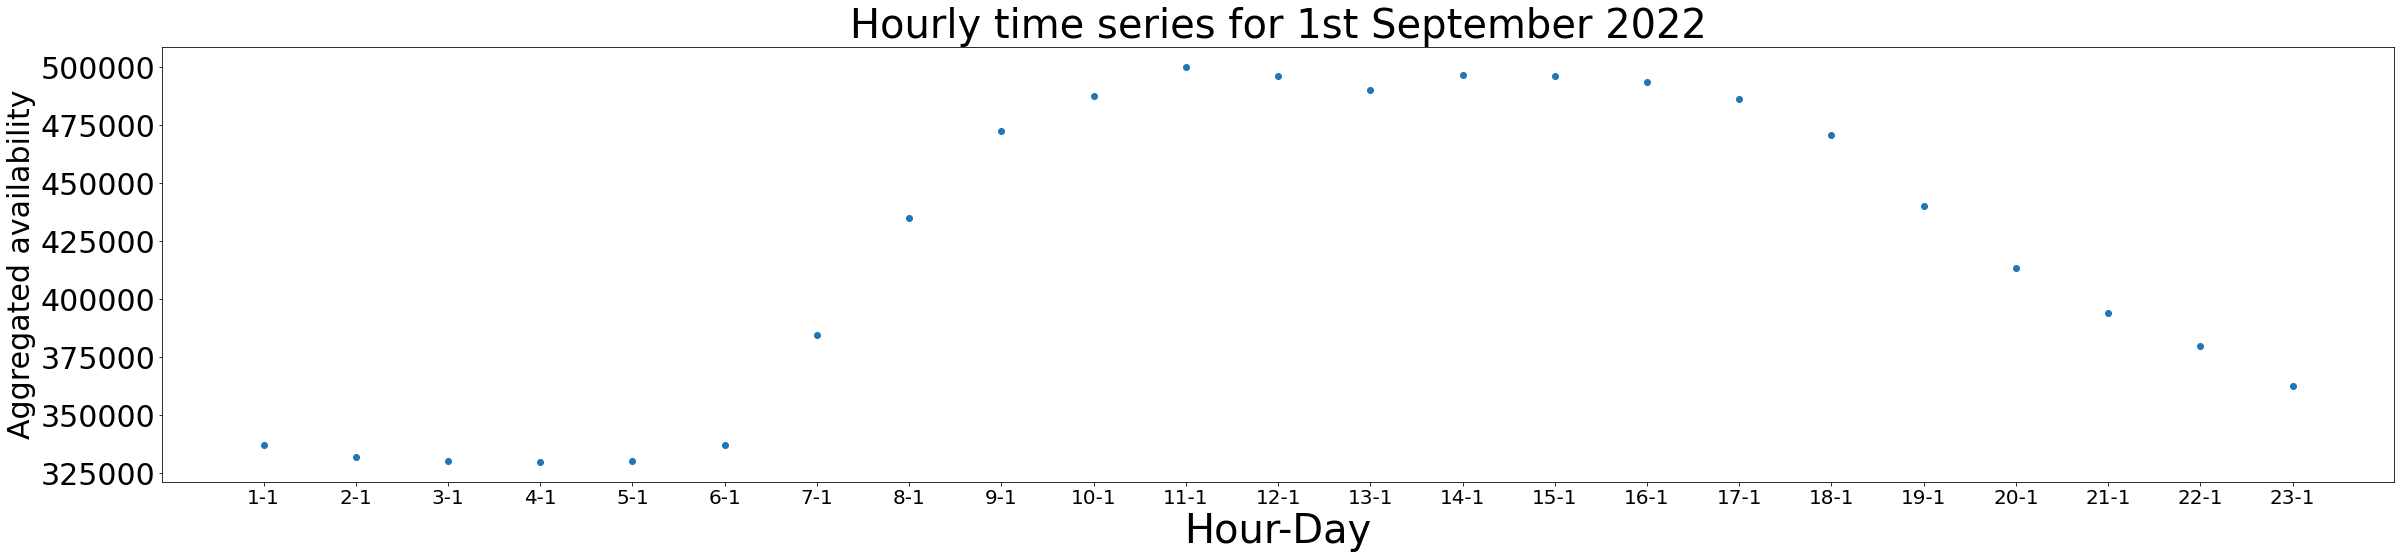

In [ ]:
plt.figure(figsize=(40,8))
plt.scatter(x[:23],y[:23])
plt.title("Hourly time series for 1st September 2022", fontdict = {'fontsize' : 40})
plt.xlabel("Hour-Day",fontsize=40)
plt.ylabel("Aggregated availability",fontsize=30)
plt.xticks(fontsize=20) #sets interval to daily, and increase fontsize for visibility
plt.yticks(fontsize=30)
plt.show()

It can observed from the above visulaisation for the 1st of September that the carpark availability increases steadly from 0600 hrs to 0700 hrs and the carpark availability remains at a high all the way upto 1800 hrs in the evening. This indicates that majority of the vehicles are in transit in the city of for a significantly long amount of time during the day.

<a name="1.5"></a>
**1.5 Intuitively, we expect that carpark availability across certain carparks to be correlated.** 

**For example, many housing carparks would experience higher carpark availability during working hours. Using the same interval chosen in 1.4, write a function to find the top five carparks with which it shows the highest correlation.** 

**Demonstrate an example of this function call using a randomly selected carpark.** 

We treat the carpark availability of a single carpark as a random variable and calculate the statistical correlation between the carparks.

The timings where there are no data available from the API are ignored, as mention in the previous section.

As the question asked for the highest correlation, we included the top 5 carparks with the highest correlation, regardless if they are positively or negatively correlated.

More explanation is provided in the code below.

In [ ]:
from math import isnan
import numpy as np

def top5_correlation(carpark):
    results = {}
    #gets index of specified carpark
    idx = sep_df.index[sep_df['carpark_number'] == carpark].tolist()[0]
    
    #calculate corr of that row against other carparks, 
    #stores it in results dictionary {'carpark_name':corr_value}
    for index, row in sep_df.iterrows():
        if idx != index:
            corr = abs(np.corrcoef(list(sep_df.iloc[idx][1:]), list(sep_df.iloc[index][1:]))[0, 1])
            results[sep_df.iloc[index]['carpark_number'] ] = corr
            
    # removes nan values
    results = {k: results[k] for k in results if not isnan(results[k])} 
    # gets top 5 highest
    my_keys = sorted(results, key=results.get, reverse=True)[:5] 
    # converts list to string
    my_keys = ", ".join(str(x) for x in my_keys)
    print("The top five carparks correlated to", carpark, "are", my_keys + '.')

top5_correlation('PDT8')

The top five carparks correlated to PDT8 are HG9, KB14, MP19, C29, PDL2.


<a name="1.6"></a>
**1.6 Group Project Proposal for Question 3: Please include a short proposal (around 500 words) of what your team intends to do for the Group Proposed Project in Question 3.** 

**For the group project proposal, you may use additional datasets to supplement your analysis or look at unaggregated data, etc. See Question 3 below for more information about this. Please use markdown in the iPython notebook to present your proposal.**

#Private and Public Transport Suggestion System

* ## <u>Problem Statement</u>
During our days of work people usually spend alot time trying to find a good parking spot so that they can get to work on time. This situation can become even more problematic if the car park present in your workplace is completely occupied and therefore a lot of time is spent trying to find the closest car park to your office.

* ## <u>Proposed Solution </u>
Since this is a problem that a lot of individuals face on a day to day basis, we decided to make use of the LTA carpark dataset provided to us to give them a heads up in advance if there will be availability of parking spaces by the time they reach their destination. We also plan on making use of the dataset to provide the rate at which car park spaces are getting occupied, so that the individual can decide if they want to park in that particular parking area or choose a different location.</br>
If the occupancy rate of a car park area is high, we plan on implementing a model which makes use of the LTA carpark dataset along with information on the amount of time it takes to reach your destination, so as to determine which mode of transport should be taken, that is either public transport or private transport.

* ## <u>Additional Features and Additional Datasets</u>
If the time permits we would also like to implement a feature where our model is capable of recommending car park locations nearby an individual destination so as to provide alternatives to the user. We plan on making observing the following dataset if the time to try and implement this feature:
<table>
<tr>
<th>Serial No.</th>
<th>Dataset</th>
</tr>
<tr>
<td>1</td>
<td>Number of HDB blocks of different areas in Singapore</td>
</tr>
<tr>
<td>2</td>
<td>Number of offices of different areas</td>
</tr>
<tr>
<td>3</td>
<td>Number of shopping malls of different areas</td>
</tr>
</table>

* ## <u>Machine Learning Model Structure and Technology Stack</u>
If the time permits we would also like to implement a feature where our model is capable of recommending car park locations nearby an individual destination so as to provide alternatives to the user. We plan on making observing the following dataset if the time to try and implement this feature:
<table>
<tr>
<th>Serial No.</th>
<th>Input</th>
</tr>
<tr>
<td>1</td>
<td>Current Location</td>
</tr>
<tr>
<td>2</td>
<td>Destination Location</td>
</tr>
<tr>
<td>3</td>
<td>Day of the Week</td>
</tr>
<tr>
<td>4</td>
<td>Current Time</td>
</tr>
</table>
1. Output for model-1 is a continuous value since we will be providing the rate at which the carpark slots are getting filled up at a particular location.
2.  Output for model-2 is a categorical value since we are trying to provide the user the best transport option to take. Output classes of the model-2 is as follows:
<table>
<tr>
<th>Serial No.</th>
<th>Class</th>
</tr>
<tr>
<td>1</td>
<td>Public Transport</td>
</tr>
<tr>
<td>2</td>
<td>Private Transport</td>
</tr>
</table>
The technology stack that will be used for the project:
<table>
<tr>
<th>Serial No.</th>
<th>Library/API</th>
<th>Details</th>
</tr>
<tr>
<td>1</td>
<td>Numpy and Pandas </td>
<td>Data Preprocessing</td>
</tr>
<tr>
<td>2</td>
<td>Sklearn</td>
<td>Models to predict the classification</td>
</tr>
<tr>
<td>3</td>
<td>Matplotlib and Seaborn</td>
<td>Visualization for studying the trends in data</td>
</tr>
<tr>
<td>4</td>
<td>Distance Matrix API</td>
<td>Google Maps API for calculating the distance of the user’s current location and the destination location</td>
</tr>
</table>

* ## <u>Limitations of Our Current Implementation</u>
<table>
<tr>
<th>Serial No.</th>
<th>Class</th>
</tr>
<tr>
<td>1</td>
<td>Public Transport</td>
</tr>
<tr>
<td>2</td>
<td>Private Transport</td>
</tr>
</table>
The technology stack that will be used for the project:
<table>
<tr>
<th>Serial No.</th>
<th>Limitation</th>
</tr>
<tr>
<td>1</td>
<td>Making use of two models for the project, which can increase the complexity in the way we handle the data</td>
</tr>
<tr>
<td>2</td>
<td>The model that makes use of the public transport dataset, will have to figure out which is the best mode of public transport (bus or train) and compare it against the the result from the carpark dataset model.</td>
</tr>
<tr>
<td>3</td>
<td>Currently none of us have made use of the distance matrix API, so we are unsure of the challenges while dealing with API.</td>
</tr>
<tr>
</table>